Import Library

In [294]:
import pandas as pd

In [296]:
import numpy as np

In [298]:
import matplotlib.pyplot as plt

In [300]:
import seaborn as sns

Import Data

In [303]:
df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')

In [304]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [306]:
df.duplicated('CustomerId').sum()

0

In [307]:
df = df.set_index('CustomerId')

In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


Encoding

In [324]:
df['Geography'].value_counts()

Geography
2    5014
1    2509
0    2477
Name: count, dtype: int64

In [326]:
df.replace({'Geography':{'France':2,'Germany':1,'Spain':0}},inplace=True)

In [328]:
df['Gender'].value_counts()

Gender
0    5457
1    4543
Name: count, dtype: int64

In [330]:
df.replace({'Gender':{'Male':0,'Female':1}},inplace =True)

In [332]:
df['Num Of Products'].value_counts()

Num Of Products
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [334]:
df.replace({'Num Of Products':{1:0,2:1,3:1,4:1}},inplace =True)

In [336]:
df['Has Credit Card'].value_counts()

Has Credit Card
1    7055
0    2945
Name: count, dtype: int64

In [338]:
df['Is Active Member'].value_counts()

Is Active Member
1    5151
0    4849
Name: count, dtype: int64

In [340]:
df.loc[(df['Balance'] == 0),'Churn'].value_counts()

Churn
0    3117
1     500
Name: count, dtype: int64

In [342]:
df['Zero Balance']=np.where(df['Balance']>0,1,0)

<Axes: >

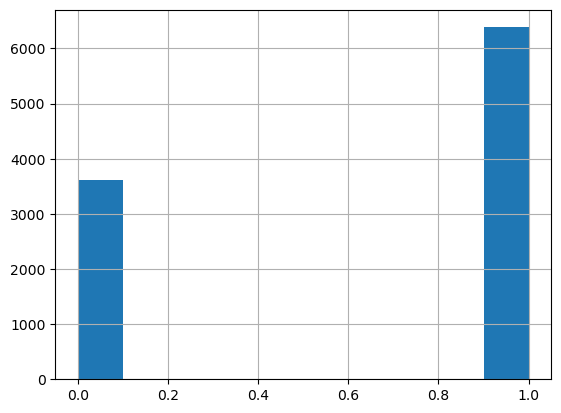

In [344]:
df['Zero Balance'].hist()

In [346]:
df.groupby(['Churn','Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

Define label and features

In [349]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [351]:
x= df.drop(['Surname','Churn'],axis=1)

In [353]:
y = df['Churn']

In [355]:
x.shape,y.shape

((10000, 11), (10000,))

Undersampling and Oversampling

In [358]:
df['Churn'].value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

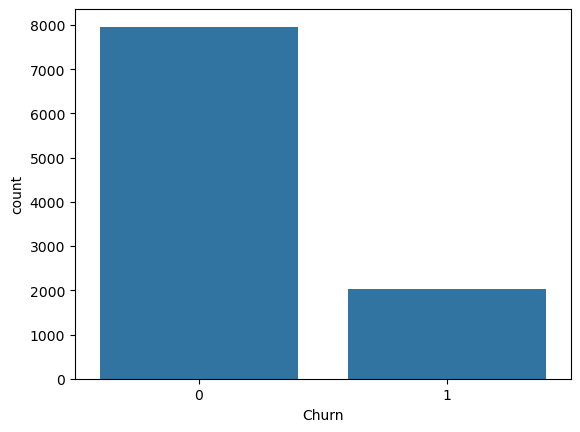

In [360]:
sns.countplot(x='Churn',data=df);

In [362]:
x.shape,y.shape

((10000, 11), (10000,))

Random under sampling

In [365]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 2529)

In [367]:
x_rus,y_rus = rus.fit_resample(x,y)

In [369]:
x_rus.shape,y_rus.shape,x.shape,y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [371]:
y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

In [373]:
y_rus.value_counts()

Churn
0    2037
1    2037
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

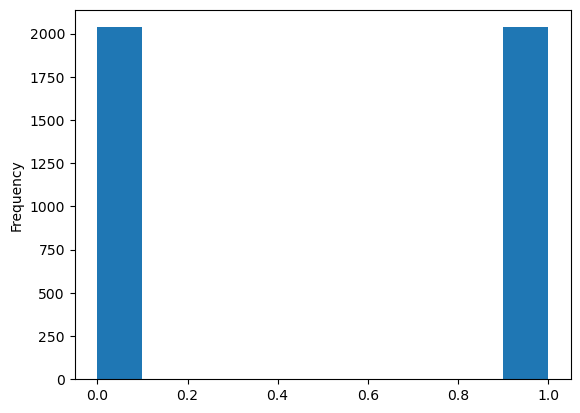

In [375]:
y_rus.plot(kind='hist')

Random Over Sampling

In [378]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state = 2529)

In [380]:
x_ros,y_ros = ros.fit_resample(x,y)

In [382]:
x_ros.shape,y_ros.shape,x.shape,y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [384]:
y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

In [386]:
y_ros.value_counts()

Churn
1    7963
0    7963
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

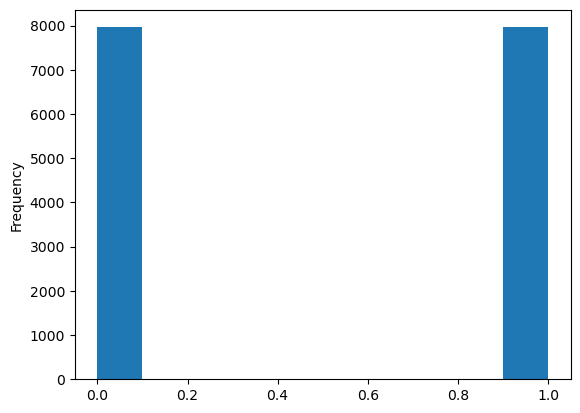

In [388]:
y_ros.plot(kind='hist')

Train test split


In [391]:
from sklearn.model_selection import train_test_split

In [393]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.3,random_state=2529)

In [395]:
x_train_rus,x_test_rus,y_train_rus,y_test_rus = train_test_split(x,y,train_size=0.3,random_state=2529)

In [397]:
x_train_ros,x_test_ros,y_train_ros,y_test_ros = train_test_split(x,y,train_size=0.3,random_state=2529)

Standardize Features

In [400]:
from sklearn.preprocessing import StandardScaler

In [402]:
sc = StandardScaler()

Standardize original Data

In [405]:
x_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [407]:
x_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

Standardize random under sample Data

In [410]:
x_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [412]:
x_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

Standardize random over sample Data

In [415]:
x_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [417]:
x_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

Support vector Machine classifier

In [420]:
from sklearn.svm import SVC

In [422]:
svc = SVC()

In [424]:
svc.fit(x_train,y_train)

SVC()

In [435]:
y_pred = svc.predict(x_test)

Model Accuracy

In [454]:
from sklearn.metrics import confusion_matrix,classification_report

In [456]:
confusion_matrix(y_test,y_pred)

array([[5476,   91],
       [1097,  336]], dtype=int64)

In [458]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      5567
           1       0.79      0.23      0.36      1433

    accuracy                           0.83      7000
   macro avg       0.81      0.61      0.63      7000
weighted avg       0.82      0.83      0.79      7000



Hyperparameter tunning

In [461]:
from sklearn.model_selection import GridSearchCV

In [463]:
param_grid = {'C':[0.1,1,10],
              'gamma':[1,0.1,0.01],
              'kernel':['rbf'],
              'class_weight':['balanced']}

In [465]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2, cv = 2)
grid.fit(x_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.8s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.8s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.8s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.7s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.5s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.6s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [467]:
print(grid.best_estimator_)

SVC(C=0.1, class_weight='balanced', gamma=1)


In [469]:
grid_predictions = grid.predict(x_test)

In [470]:
confusion_matrix(y_test,grid_predictions)

array([[5002,  565],
       [ 823,  610]], dtype=int64)

In [471]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      5567
           1       0.52      0.43      0.47      1433

    accuracy                           0.80      7000
   macro avg       0.69      0.66      0.67      7000
weighted avg       0.79      0.80      0.79      7000



Model with Random under sampling

In [476]:
svc_rus = SVC()

In [478]:
svc_rus.fit(x_train_rus,y_train_rus)

SVC()

In [481]:
y_pred_rus = svc_rus.predict(x_test_rus)

Model Accuracy

In [484]:
confusion_matrix(y_test_rus,y_pred_rus)

array([[5476,   91],
       [1097,  336]], dtype=int64)

In [486]:
print(classification_report(y_test_rus,y_pred_rus))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      5567
           1       0.79      0.23      0.36      1433

    accuracy                           0.83      7000
   macro avg       0.81      0.61      0.63      7000
weighted avg       0.82      0.83      0.79      7000



Hyperparameter tunning


In [489]:
param_grid = {'C':[0.1,1,10],
              'gamma':[1,0.1,0.01],
              'kernel':['rbf'],
              'class_weight':['balanced']}

In [491]:
grid_rus = GridSearchCV(SVC(),param_grid,refit=True,verbose=2, cv = 2)
grid_rus.fit(x_train_rus,y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.8s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.7s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.7s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.7s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.5s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.5s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.6s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [493]:
print(grid_rus.best_estimator_)

SVC(C=0.1, class_weight='balanced', gamma=1)


In [495]:
grid_predictions_rus = grid_rus.predict(x_test_rus)

In [497]:
confusion_matrix(y_test_rus,grid_predictions_rus)

array([[5002,  565],
       [ 823,  610]], dtype=int64)

In [499]:
print(classification_report(y_test_rus,grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      5567
           1       0.52      0.43      0.47      1433

    accuracy                           0.80      7000
   macro avg       0.69      0.66      0.67      7000
weighted avg       0.79      0.80      0.79      7000



Model with Random over sampling

In [504]:
svc_ros = SVC()

In [506]:
svc_ros.fit(x_train_ros,y_train_ros)

SVC()

In [508]:
y_pred_ros = svc_ros.predict(x_test_ros)

Model_Accuracy

In [511]:
confusion_matrix(y_test_ros,y_pred_ros)

array([[5476,   91],
       [1097,  336]], dtype=int64)

In [513]:
print(classification_report(y_test_ros,y_pred_ros))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      5567
           1       0.79      0.23      0.36      1433

    accuracy                           0.83      7000
   macro avg       0.81      0.61      0.63      7000
weighted avg       0.82      0.83      0.79      7000



Hyperparameter Tunning

In [518]:
param_grid = {'C':[0.1,1,10],
              'gamma':[1,0.1,0.01],
              'kernel':['rbf'],
              'class_weight':['balanced']}

In [520]:
grid_ros = GridSearchCV(SVC(),param_grid,refit=True,verbose=2, cv = 2)
grid_ros.fit(x_train_ros,y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.8s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.7s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.8s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.8s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.5s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.5s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.6s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [522]:
print(grid_ros.best_estimator_)

SVC(C=0.1, class_weight='balanced', gamma=1)


In [524]:
grid_predictions_ros = grid_ros.predict(x_test_ros)

In [526]:
confusion_matrix(y_test_ros,grid_predictions_ros)

array([[5002,  565],
       [ 823,  610]], dtype=int64)

In [528]:
print(classification_report(y_test_ros,grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      5567
           1       0.52      0.43      0.47      1433

    accuracy                           0.80      7000
   macro avg       0.69      0.66      0.67      7000
weighted avg       0.79      0.80      0.79      7000

